# Tiling experiments
This paperwork will analyze data obtained from tiling experiments to compare 4 features of 4 different algorithms' implementations.

The features or variables to measure are the following:
- Algorithm speed up
- Cache misses
- Total of instructions executed
- Cores rate usage

The 4 algorithms selected for the experiment were:
- Matrix multiplication
- Vector multiplication
- Jacobi Example
- ? (still in process)

For each algorithm will have 4 versions
- Original implementation.
- Tiled and handed parallelized algorithm from a benchmark.
- Tiled and parallelized algorithm using Cetus.
- Tiled, parallelized and loop interchange applied algorithm using Cetus.

## Methodology

The proposed methodology is, we will have 4 different versions for each algorithm and will measure the features above for each of them. After that, we are going to use the data obtained to see if tiling improves the algorithms' performance.

For each measurement the independent variable will be the amount ofcores to use for each experiment instance.

## Data creation
For obtaining/creating the data, we will use a group of tools to obtain data in runtime. Those tools are the following:
- PAPI: To access hardware counters and to measure: Cache misses and total of instructions executed
- OMP directives: To measure elapsed time for an algorithm execution and to measure speed up and cores rate usage.

## Experiment results

In [22]:
import pandas as pd

df = pd.read_csv("./experiments/matrix-multiplication/speed-up.csv", names=['algorithm','version', 'cores', 'experiment', 'N','M','value'])
df

,algorithm,version,cores,experiment,N,M,value
0,matrix-mult,parallel-non-tiled,1,speed-up,1000,1000,5.710395
1,matrix-mult,parallel-paw-tiled,1,speed-up,1000,1000,6.543273
2,matrix-mult,parallel-non-tiled,2,speed-up,1000,1000,2.984696
3,matrix-mult,parallel-paw-tiled,2,speed-up,1000,1000,3.307785
4,matrix-mult,parallel-non-tiled,3,speed-up,1000,1000,1.992386
...,...,...,...,...,...,...,...
59,matrix-mult,parallel-paw-tiled,30,speed-up,1000,1000,0.351028
60,matrix-mult,parallel-non-tiled,31,speed-up,1000,1000,0.303810
61,matrix-mult,parallel-paw-tiled,31,speed-up,1000,1000,0.343542
62,matrix-mult,parallel-paw-tiled,32,speed-up,1000,1000,0.240397


In [23]:
nonTiledDf = df[ (df['algorithm']=='matrix-mult') & (df['version'] =='parallel-non-tiled') ]
nonTiledDf.head()


,algorithm,version,cores,experiment,N,M,value
0,matrix-mult,parallel-non-tiled,1,speed-up,1000,1000,5.710395
2,matrix-mult,parallel-non-tiled,2,speed-up,1000,1000,2.984696
4,matrix-mult,parallel-non-tiled,3,speed-up,1000,1000,1.992386
6,matrix-mult,parallel-non-tiled,4,speed-up,1000,1000,1.492317
8,matrix-mult,parallel-non-tiled,5,speed-up,1000,1000,1.201010


In [24]:
tiledDf = df[ (df['algorithm']=='matrix-mult') & (df['version'] =='parallel-paw-tiled') ]
tiledDf.head()

,algorithm,version,cores,experiment,N,M,value
1,matrix-mult,parallel-paw-tiled,1,speed-up,1000,1000,6.543273
3,matrix-mult,parallel-paw-tiled,2,speed-up,1000,1000,3.307785
5,matrix-mult,parallel-paw-tiled,3,speed-up,1000,1000,2.201158
7,matrix-mult,parallel-paw-tiled,4,speed-up,1000,1000,1.649091
9,matrix-mult,parallel-paw-tiled,5,speed-up,1000,1000,1.340864


In [25]:
xmin, xmax, ymin, ymax = [
    min(nonTiledDf['cores'].min(), tiledDf['cores'].min()),
    max(nonTiledDf['cores'].max(), tiledDf['cores'].max()),
    min(nonTiledDf['value'].min(), tiledDf['value'].min()),
    max(nonTiledDf['value'].max(), tiledDf['value'].max()),
]
xmin, xmax, ymin, ymax

(1, 32, 0.240397, 6.543273)

In [26]:
min_cores = 0
if(len(nonTiledDf[(nonTiledDf['value'] == ymin)]) == 0):
    min_cores = tiledDf[(tiledDf['value'] == ymin)]['cores'].values[0]
    
min_cores
    

32

In [27]:
tiledDf[(tiledDf['value']==tiledDf['value'].min())]

,algorithm,version,cores,experiment,N,M,value
62,matrix-mult,parallel-paw-tiled,32,speed-up,1000,1000,0.240397


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


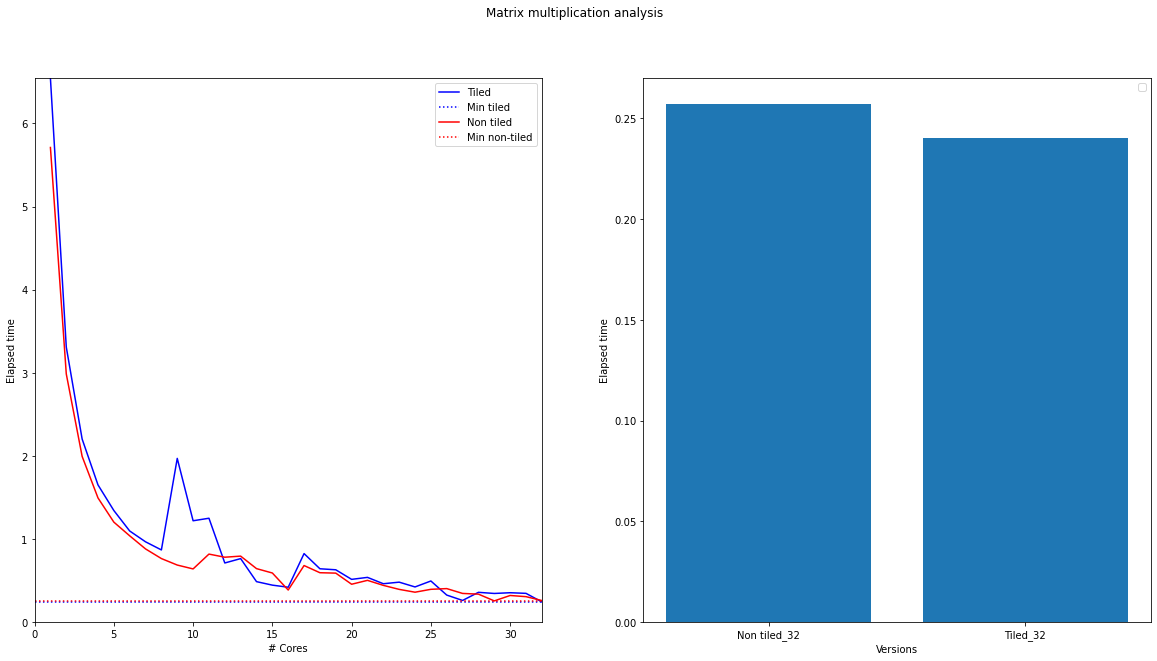

In [76]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 10))

plt.subplot(121)


plt.suptitle('Matrix multiplication analysis')

plt.ylabel('Elapsed time')
plt.xlabel('# Cores')

plt.axis([0,xmax,0,ymax])

#xmin, xmax, ymin, ymax = axis()
tiledLine, = plt.plot(tiledDf['cores'], tiledDf['value'], 'b')
tiledLine.set_label('Tiled')
plt.axhline(y=tiledDf['value'].min(),color='b',linestyle=":", label='Min tiled' )

nonTiledLine, = plt.plot(nonTiledDf['cores'], nonTiledDf['value'], 'r')
nonTiledLine.set_label('Non tiled')
plt.axhline(y=nonTiledDf['value'].min(),color='r',linestyle=":", label='Min non-tiled' )


plt.legend()


names = ["Non tiled_"+str(min_cores), "Tiled_"+str(min_cores)]


values = [nonTiledDf[(nonTiledDf['cores'] == min_cores)]['value'].min(), 
          tiledDf[(tiledDf['cores'] == min_cores)]['value'].min()]


plt.subplot(122)
plt.bar(names, values)
plt.ylabel('Elapsed time')
plt.xlabel('Versions')

plt.legend()


plt.show()

In [67]:
import pandas as pd

jdf = pd.read_csv("./experiments/speed-up/jacobi-speed-up.csv", names=['algorithm','version', 'cores', 'experiment', 'N','M','value'])
jdf

,algorithm,version,cores,experiment,N,M,value
0,jacobi,parallel-paw-tiled,1,speed-up,2000,2000,0.043703
1,jacobi,parallel-non-tiled,1,speed-up,2000,2000,0.043588
2,jacobi,parallel-non-tiled,2,speed-up,2000,2000,0.025241
3,jacobi,parallel-paw-tiled,2,speed-up,2000,2000,0.030217
4,jacobi,parallel-non-tiled,3,speed-up,2000,2000,0.019236
...,...,...,...,...,...,...,...
59,jacobi,parallel-paw-tiled,30,speed-up,2000,2000,0.045924
60,jacobi,parallel-non-tiled,31,speed-up,2000,2000,0.023355
61,jacobi,parallel-paw-tiled,31,speed-up,2000,2000,0.046876
62,jacobi,parallel-non-tiled,32,speed-up,2000,2000,0.019340


In [68]:
jnonTiledDf = jdf[ (jdf['algorithm']=='jacobi') & (jdf['version'] =='parallel-non-tiled') ]
jnonTiledDf.head()

,algorithm,version,cores,experiment,N,M,value
1,jacobi,parallel-non-tiled,1,speed-up,2000,2000,0.043588
2,jacobi,parallel-non-tiled,2,speed-up,2000,2000,0.025241
4,jacobi,parallel-non-tiled,3,speed-up,2000,2000,0.019236
6,jacobi,parallel-non-tiled,4,speed-up,2000,2000,0.015111
8,jacobi,parallel-non-tiled,5,speed-up,2000,2000,0.011423


In [69]:
jtiledDf = jdf[ (jdf['algorithm']=='jacobi') & (jdf['version'] =='parallel-paw-tiled') ]
jtiledDf.head()

,algorithm,version,cores,experiment,N,M,value
0,jacobi,parallel-paw-tiled,1,speed-up,2000,2000,0.043703
3,jacobi,parallel-paw-tiled,2,speed-up,2000,2000,0.030217
5,jacobi,parallel-paw-tiled,3,speed-up,2000,2000,0.029732
7,jacobi,parallel-paw-tiled,4,speed-up,2000,2000,0.030558
9,jacobi,parallel-paw-tiled,5,speed-up,2000,2000,0.052708


In [70]:
jxmin, jxmax, jymin, jymax = [
    min(jnonTiledDf['cores'].min(), jtiledDf['cores'].min()),
    max(jnonTiledDf['cores'].max(), jtiledDf['cores'].max()),
    min(jnonTiledDf['value'].min(), jtiledDf['value'].min()),
    max(jnonTiledDf['value'].max(), jtiledDf['value'].max()),
]
jxmin, jxmax, jymin, jymax

(1, 32, 0.011423, 0.087866)

In [82]:
jmin_cores = 0
if(len(jnonTiledDf[(jnonTiledDf['value'] == jymin)]) == 0):
    jmin_cores = jtiledDf[(jtiledDf['value'] == jymin)]['cores'].values[0]
else:
    jmin_cores = jnonTiledDf[(jnonTiledDf['value'] == jymin)]['cores'].values[0]

jmin_cores

5

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


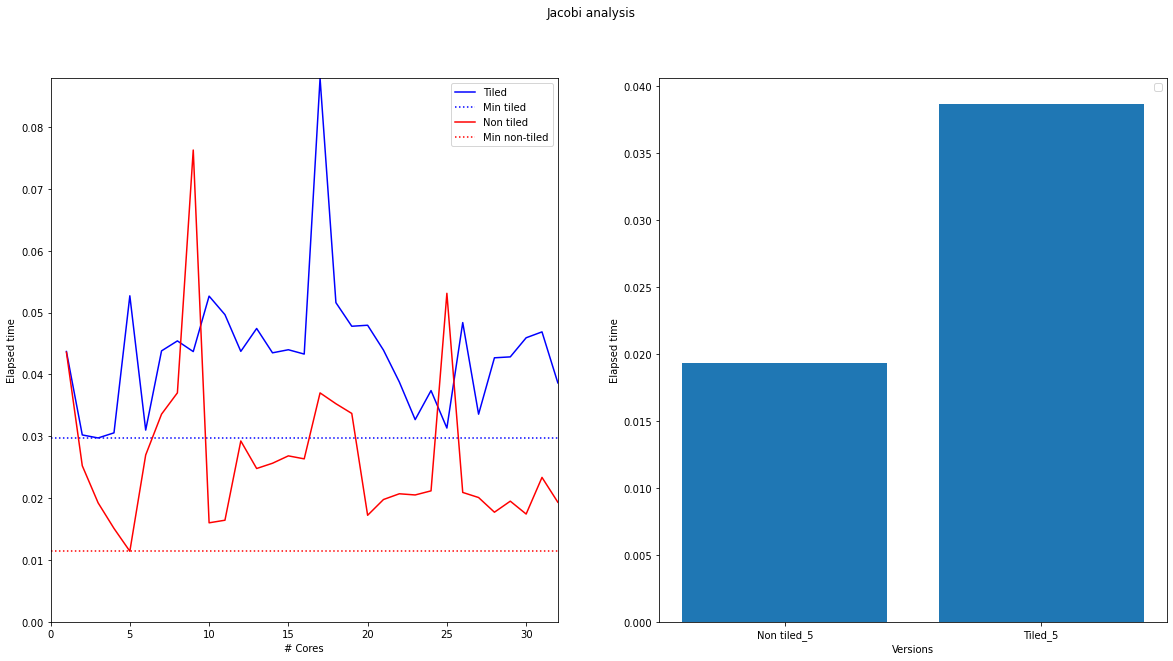

In [83]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 10))

plt.subplot(121)


plt.suptitle('Jacobi analysis')

plt.ylabel('Elapsed time')
plt.xlabel('# Cores')

plt.axis([0,jxmax,0,jymax])

#xmin, xmax, ymin, ymax = axis()
tiledLine, = plt.plot(jtiledDf['cores'], jtiledDf['value'], 'b')
tiledLine.set_label('Tiled')
plt.axhline(y=jtiledDf['value'].min(),color='b',linestyle=":", label='Min tiled' )

nonTiledLine, = plt.plot(jnonTiledDf['cores'], jnonTiledDf['value'], 'r')
nonTiledLine.set_label('Non tiled')
plt.axhline(y=jnonTiledDf['value'].min(),color='r',linestyle=":", label='Min non-tiled' )


plt.legend()


names = ['Non tiled_'+str(jmin_cores), 'Tiled_'+str(jmin_cores)]


values = [jnonTiledDf[(jnonTiledDf['cores'] == min_cores)]['value'].min(), 
          jtiledDf[(jtiledDf['cores'] == min_cores)]['value'].min()]


plt.subplot(122)
plt.bar(names, values)
plt.ylabel('Elapsed time')
plt.xlabel('Versions')

plt.legend()


plt.show()